# Wisconsin Diagnostic Breast Cancer (wdbc) Dataset
- **Binary Classification - Logistic Regression**

- https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
    - Read the description to understand about the features (_wdbc.names_).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Open the CSV file in a text editor and check whether all details are according to expectations.
- There is no header information availabe in the CSV file.
    - So, use appropriate settingsto load the file, otherwise the first row will be considered as header information.

In [ ]:
df = pd.read_csv("data/Wisconsin.csv", header=None) # Check what happens if header=None is not provided.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### From the description, we can understand that the input attributes/features are starting from the 3rd column until the end.
- First two are patientID and label (M = malinant, B = benign)
- Notice that the labels are non-numeric. ML models can only deal with numeric data.




In [ ]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [ ]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

### -------------------------------------------------------------------------------------------------

### Select customized columns

In [ ]:
X1 = df.iloc[:,[2,4,6]]
X1.head()

,2,4,6
0,17.99,122.80,0.11840
1,20.57,132.90,0.08474
2,19.69,130.00,0.10960
3,11.42,77.58,0.14250
4,20.29,135.10,0.10030


In [ ]:
print(df.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')


### -------------------------------------------------------------------------------------------------

In [ ]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

**Convert non-numeric labels to numeric labels**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
# The equivalence between numeric and non-numeric labels
print(le.classes_)

['B' 'M']


### Split data into 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.20,
                                                   stratify = y,
                                                   random_state = 42)

In [ ]:
print(f'Number of samples and attributes: {X_train.shape}')

Number of samples and attributes: (455, 30)


### How to visualize this 30-dimensional data? (EDA: Exploratory Data Analysis)
- use Principal Component Analysis (PCA) to reduce the dimension.


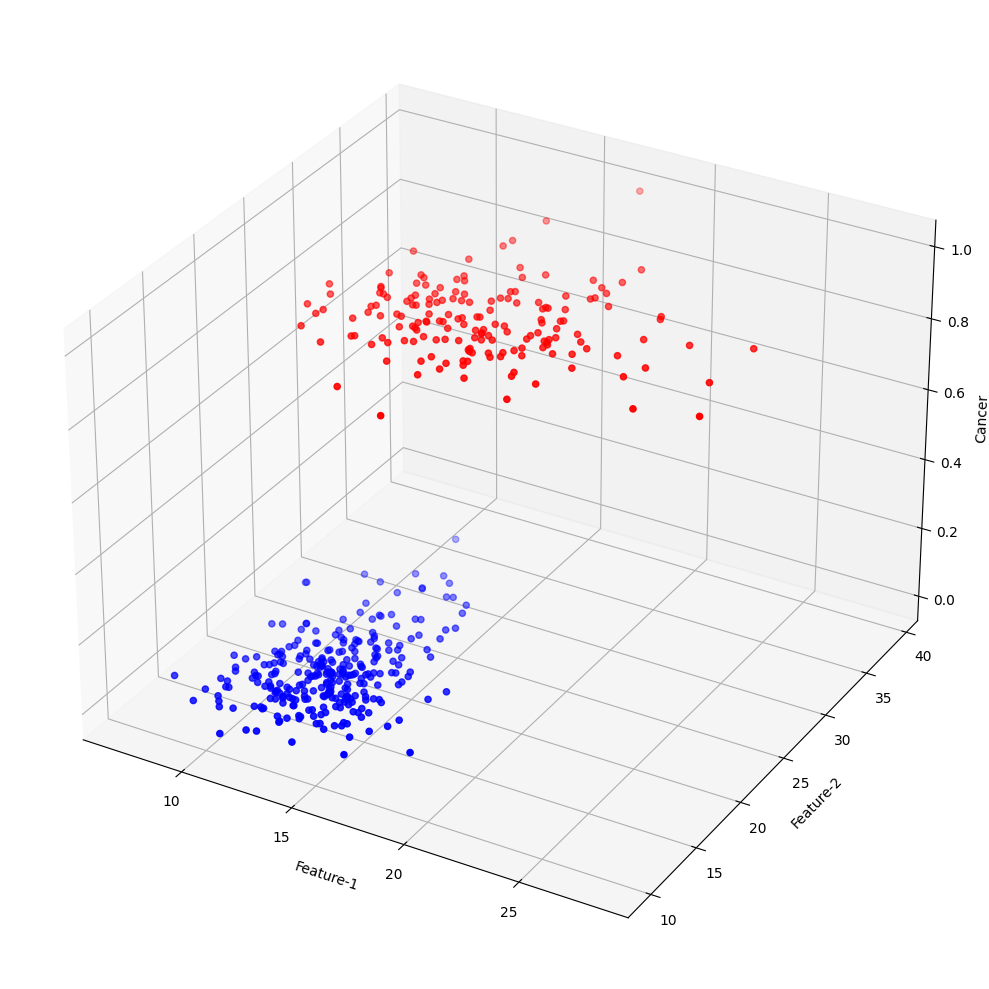

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("Feature-1")
ax.set_ylabel("Feature-2")
ax.set_zlabel("Cancer")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)

X_train_2D_pca = pca2.transform(X_train)

print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')

PCA Features: Number of samples and attributes: (455, 2)


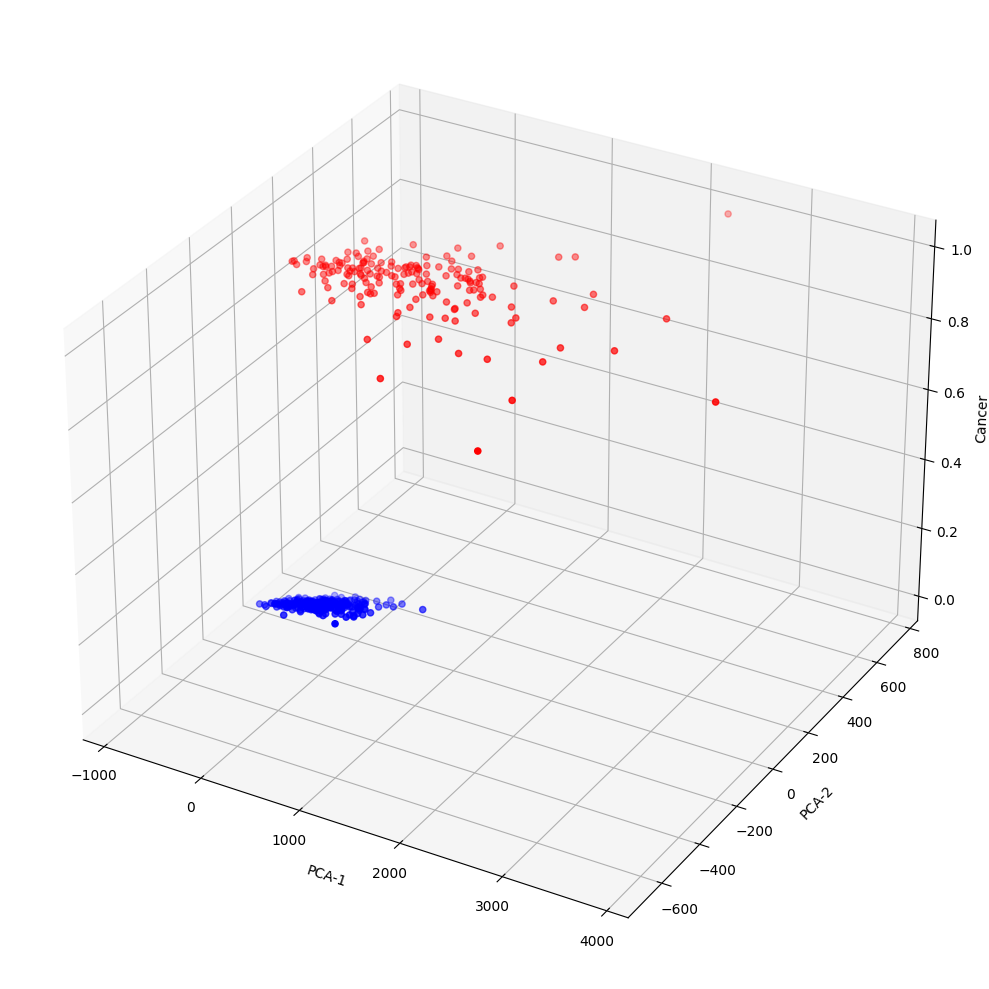

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[y_train==0, 0], X_train_2D_pca[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_pca[y_train==1, 0], X_train_2D_pca[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Cancer")

plt.tight_layout()
plt.show()

### Using another approach for dimensionality reduction for visuaization
- tSNE: t-distributed Stochastic Neighbor Embedding (Manifold approach)

In [ ]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')

X_train_2D_tsne = tsne2.fit_transform(X_train)

print(f'tSNE Embedding: Number of samples and attributes: {X_train_2D_tsne.shape}')

tSNE Embedding: Number of samples and attributes: (455, 2)


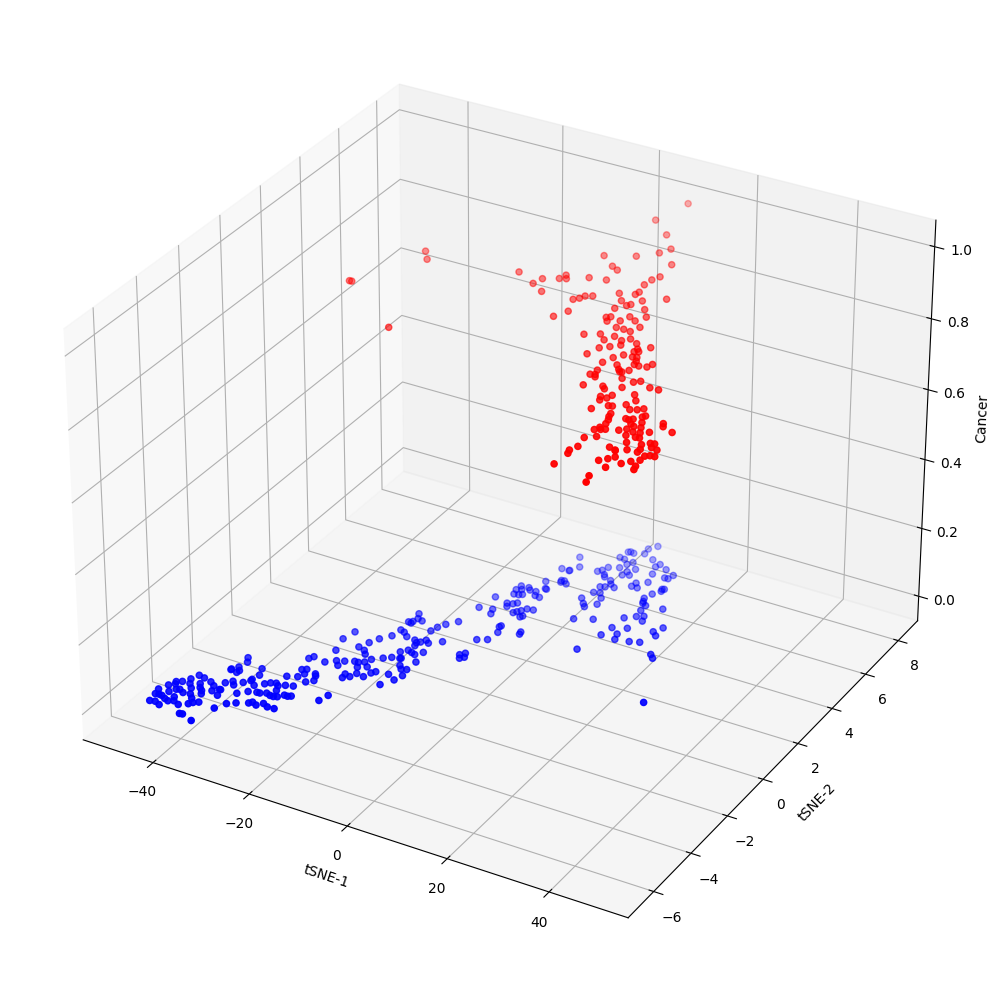

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_tsne[y_train==0, 0], X_train_2D_tsne[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_tsne[y_train==1, 0], X_train_2D_tsne[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Cancer")

plt.tight_layout()
plt.show()

## Training with complete set of features

### Use the LogisticRegression for binary classification
Uses LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) algorithm for faster convergance.

- https://en.wikipedia.org/wiki/Limited-memory_BFGS
- https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Test the performance of the model

score = lr_clf.score(X_test, y_test)
print(f'Classification accuray using raw data is {score}%')

Classification accuray using raw data is 0.9210526315789473%


### Apply standard scaling and check the performance of the model
- Train a separate model for scaled version

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf_std = LogisticRegression()
lr_clf_std.fit(X_train_std, y_train)

# Notice that there is no warning message appearing here.
# This is because of applying feature scaling.

LogisticRegression()

In [ ]:
# Test the performance of the model

score_std = lr_clf_std.score(X_test_std, y_test)

print(f'Classification accuray after feature scaling is {score_std}%')

print(f'Classification accuray using raw data is {score}%')

Classification accuray after feature scaling is 0.9649122807017544%
Classification accuray using raw data is 0.9210526315789473%


### How to look at the values predicted by the model?

In [ ]:
y_pred = lr_clf_std.predict(X_test_std)
print(y_pred)

[0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1]


In [ ]:
print(y_test) # These are the ground-truth labels

[0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]


### Look at the Confusioin matrix and other metrics such as Precision, Recall and F1-Score

In [ ]:
from sklearn.metrics import confusion_matrix

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confMatrix)

[[71  1]
 [ 3 39]]


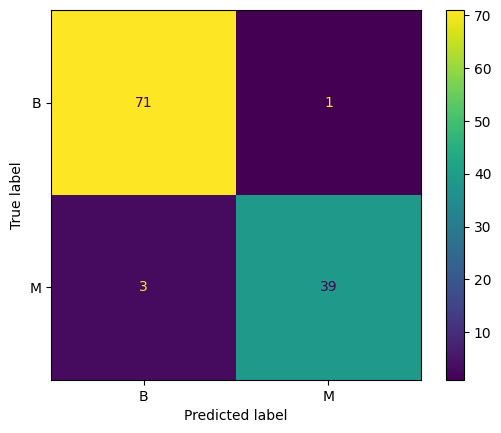

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix,
                              display_labels=le.classes_)

disp.plot()
plt.show()

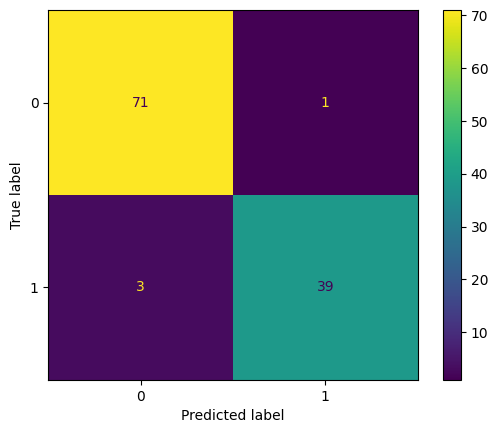

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Precision: 0.975
Recall: 0.929
F1: 0.951
